## Map Gender against Author Data

In [2]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Gender Data
1. Convert given file by removing square bracktes
2. Read converted file by splutting at -> }, {
3. Re-add brackets
4. extract names and gender using eval
5. Keep only gendered names

In [111]:
# Converted: Removed Array Brackets from original
with open('../../01 Data/02 Genderize/99 Final/converted_genderize_results.txt', 'r') as f:
    for line in f:
        fields = line.split('}, {')

In [131]:
# Manually add back braces to later convert to json/eval
new = []
for val in fields:
    new.append(str('{') + val + str('}'))
    
# Remove extra brackets at the start and the end
new[0] = new[0][1:]
new[-1] = new[-1][:-1]

In [145]:
gen_dict = {}

for val in new:
    
    # Only keep those names that actually have gender associated with them
    if eval(val)['gender'] in ('male', 'female'):
        gen_dict[eval(val)['name']] = eval(val)['gender']

gen_dict

{'david': 'male',
 'marina': 'female',
 'robert': 'male',
 'warren': 'male',
 'richard': 'male',
 'liliana': 'female',
 'clifford': 'male',
 'georgii': 'male',
 'jerry': 'male',
 'william': 'male',
 'carlos': 'male',
 'lior': 'male',
 'daniel': 'male',
 'paul': 'male',
 'jolien': 'female',
 'stephen': 'male',
 'deog': 'male',
 'christopher': 'male',
 'stanley': 'male',
 'thomas': 'male',
 'gary': 'male',
 'chong': 'male',
 'bing': 'male',
 'jin': 'male',
 'chen': 'male',
 'adam': 'male',
 'john': 'male',
 'mark': 'male',
 'martin': 'male',
 'fred': 'male',
 'javier': 'male',
 'markus': 'male',
 'shin': 'male',
 'ariel': 'male',
 'yogendra': 'male',
 'jae': 'male',
 'yeong': 'male',
 'igor': 'male',
 'ron': 'male',
 'dennis': 'male',
 'peter': 'male',
 'charles': 'male',
 'francine': 'female',
 'michael': 'male',
 'pedro': 'male',
 'fintan': 'male',
 'claudio': 'male',
 'gregory': 'male',
 'eric': 'male',
 'douglas': 'male',
 'simon': 'male',
 'theocharis': 'male',
 'steven': 'male',
 '

#### Read Author Data

In [173]:
col = ["paper_id", "date", "name",'fname', 'lname', "affiliationIds"]
df = pd.read_csv('../../01 Data/03 Consolidated/authors_write_each_line_v9.csv', names=col)
df

,paper_id,date,name,fname,lname,affiliationIds
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[]
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[]
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[]
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[]
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[]
...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1


#### Map Gender

In [176]:
# Normalize fname for matching
df['norm_fname'] = df['fname'].apply(lambda x: x.lower().replace('.', '') if x==x else np.nan)

In [177]:
df['gender'] = df['norm_fname'].apply(lambda x: gen_dict[x] if x==x and x in gen_dict else np.nan)

In [254]:
df

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],tomoyuki,NaN
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],yuichiro,NaN
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],makoto,male
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],takayuki,male
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],hayato,NaN
...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,a,NaN
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,f,NaN
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,a,NaN


In [248]:
print("# Total Authors: {:,}".format(len(df.gender)))
print("# Authors w/ Gender info: {:,}".format(df.gender.count()))
print("% of Authors w/ Gender info: {0:0.2f}%".format(100*df.gender.count()/df.shape[0]))

# Total Authors: 2,503,843
# Authors w/ Gender info: 430,090
% of Authors w/ Gender info: 17.18%


###### Imp: Only 17% of Data has Gender Info

In [250]:
# print("# Male Names: {:,}".format(len(df[df['gender'] =='male'])))
# print("# Female Names: {:,}".format(len(df[df['gender'] =='female'])))

% Males: 89.47%
% Females: 10.53%


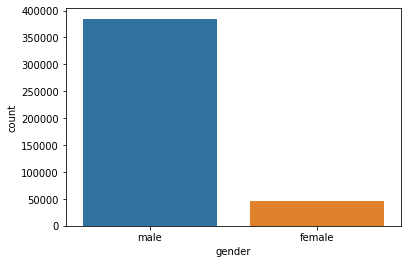

In [251]:
print("% Males: {0:0.2f}%".format(100*len(df[df['gender'] =='male'])/df.gender.count()))
print("% Females: {0:0.2f}%".format(100*len(df[df['gender'] =='female'])/df.gender.count()))

sns.countplot(df.gender)

###### Write Data to File